# Week 06: Machine Learning - II

## Understanding Linear Regression through Boston Housing Data

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Importing scikit learn and loading the boston housing dataset

from sklearn.datasets import load_boston

boston = load_boston()

In [ ]:
# Check what the data dictionary has

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
# Describe

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Load into Pandas dataframe

df_boston = pd.DataFrame(boston.data)
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Add column names

df_boston.columns = boston.feature_names
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Text(0, 0.5, 'Count')

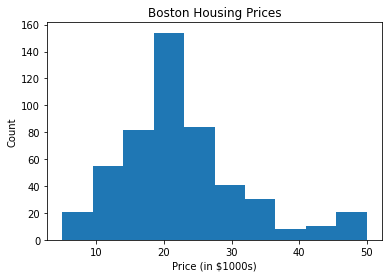

In [ ]:
# Plot to see the housing price variation in $1000

plt.hist(boston.target)
plt.title('Boston Housing Prices')
plt.xlabel('Price (in $1000s)')
plt.ylabel('Count')

# plt.show()

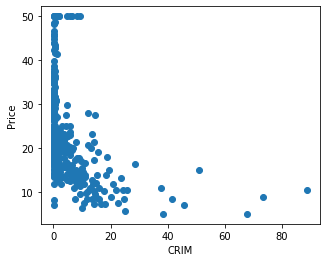

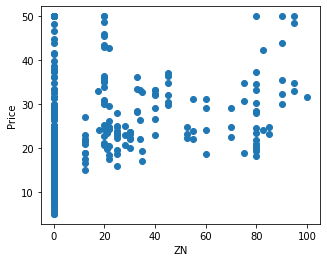

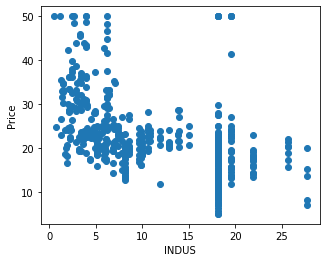

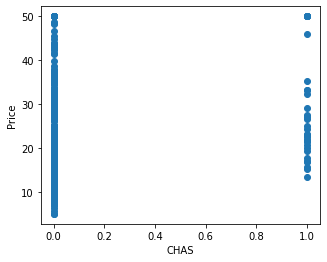

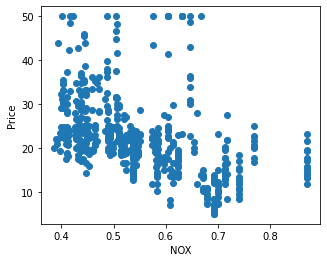

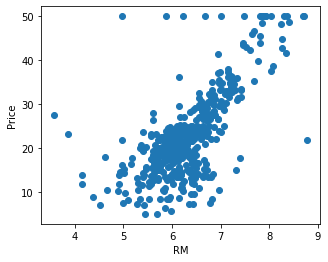

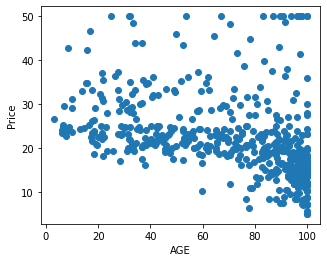

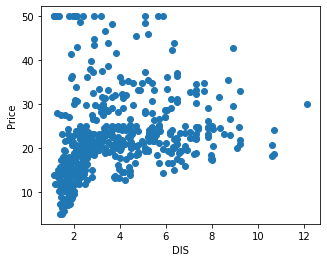

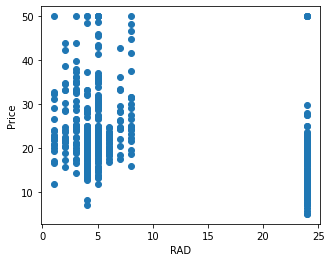

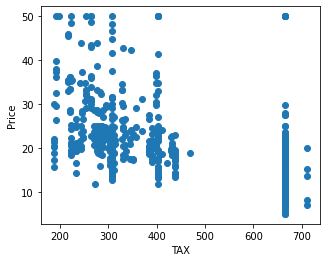

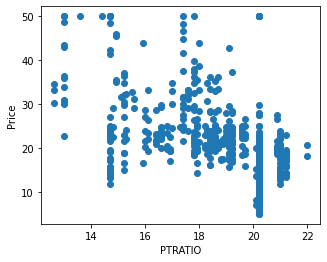

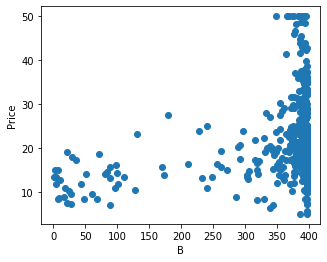

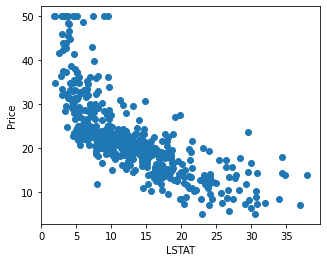

In [ ]:
# A plot for price vs. multiple features

for index, feature_name in enumerate(boston.feature_names):
  plt.figure(figsize=(5,4))
  plt.scatter(df_boston.iloc[:,index], boston.target)
  plt.ylabel('Price')
  plt.xlabel(feature_name)

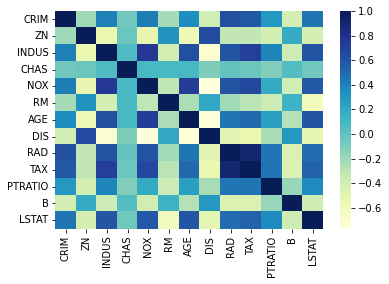

In [ ]:
# Creating a correlation matrix across the features

boston = load_boston()
boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
correlation_matrix = boston_pd.corr().round(2)
sns.heatmap(correlation_matrix, cmap='YlGnBu')

In [ ]:
# Size of the target variable

Y = boston.target
print(Y.shape)

(506,)


In [ ]:
# Taking the dataframe as input

X = df_boston

In [ ]:
# Splitting the dataset into training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [ ]:
# Checking the size of the test data

y_test.shape

(152,)

In [ ]:
# Creating a regression line

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [ ]:
# Fitting the line over the training values

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Print predictions

y_pred = regressor.predict(X_test)
print(y_pred)

[23.13141648 19.04236056 19.90667539 19.13363062  5.63987158 12.36512861
 21.54582599 28.78114114 29.07489578 13.52563202  6.50545691 32.78755702
 19.05252344 20.1210957  37.20255916 22.85503396 29.10024235 33.14758964
 10.32798994 24.54004406 21.38106748 27.80699896 37.64235385 13.55652586
  9.47660123 14.79462184 35.70823989 26.19726868 25.64364448 27.05315269
 19.05349274 30.5857944  31.49146231 16.08300112 39.93303349 20.2992577
 19.02787296 16.81205185 21.72238266 28.20359159 27.11850134 19.38008328
 14.53851989 25.9678028  18.59541816 13.69418496 25.09813674 19.15786119
 20.37253872  6.16143831 27.8316409  26.86444524 12.62081824 40.17250573
 14.54837949 22.09951006 20.37320056 20.52154415 23.61391311 21.96093581
 20.89691406 35.52881222 17.29996777 21.00710596 24.28425364 43.44474773
 19.72493904 20.23792323 22.4800794  28.30484615 25.65190271 13.27386815
 13.10487234 33.47518017 26.16890282 22.60998655 12.13384224 16.69827487
 28.61091298 17.91500621 24.56603892 27.80399381 23.

In [ ]:
print(y_test)

[21.7 18.5 22.2 20.4  8.8  8.3 21.4 23.6 23.5 19.  10.2 31.6 18.4 19.4
 44.  23.2 22.  33.1 13.2 21.7 16.7 23.9 42.3 18.5 14.6  7.5 33.4 22.
 28.1 24.8 19.9 24.8 28.7 14.1 43.5 20.4 18.3 13.4 21.  22.  22.6 13.9
 13.3 26.5 20.   9.5 21.6 22.6 15.6 23.1 27.1 25.2 15.  21.9  9.6 22.7
 18.3 21.4 20.5 21.1 24.5 31.  18.7 18.7 22.7 50.  16.7 23.  20.4 22.8
 24.8 10.5 18.2 31.5 23.8 19.6 12.7 15.2 31.2 14.5 17.8 25.  23.  50.
 23.7 25.1 24.7 16.8 34.7 23.3 50.  46.7 43.1 24.4 24.1  6.3 26.4 16.3
 17.2 28.  15.2 16.6 20.6 16.4 22.  17.2 13.5 23.3 26.2 19.7 13.1 23.9
 18.2 19.3  7.  18.5 13.8 33.4 12.6 19.6 20.8 25.  21.7 43.8 13.4 34.9
 24.5 26.6 36.5 31.1 22.6 20.3 18.4 28.7 23.1 17.6 35.4 31.6  8.5 22.2
 10.4 22.8 23.9 22.2 32.9 15.6 29.8 14.3 28.4 21.4 23.1 10.4]


In [ ]:
# Printing the coefficients of the regression lines plotted over

regressor.coef_

array([-1.05682313e-01,  2.78511721e-02,  1.97751387e-02,  2.74948915e+00,
       -1.55671652e+01,  5.31495793e+00, -1.07626811e-02, -1.31230457e+00,
        2.55970709e-01, -1.06786333e-02, -9.61979065e-01,  1.18877016e-02,
       -3.85699081e-01])

In [ ]:
# Printing the intercept value

regressor.intercept_

23.5621367255242

In [ ]:
# Finding R2 score

from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_test, y_pred)

0.650841772032956

In [ ]:
# Finding MSE

mean_squared_error(y_test, y_pred)

25.76787949083653

In [ ]:
mean_squared_error(y_pred, y_test)

25.76787949083653

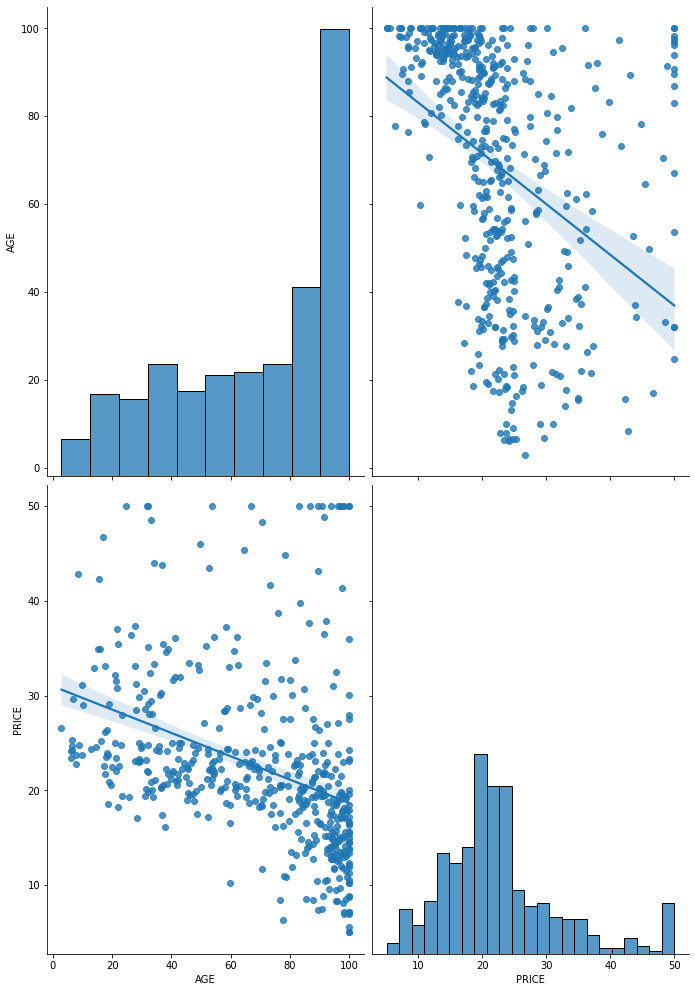

In [ ]:
# Relation between the price and age with the regression line

plot_df = df_boston.copy()
plot_df['PRICE'] = boston.target

sns.pairplot(plot_df, vars=['AGE', 'PRICE'], height=7, aspect=0.7, kind='reg')

In [ ]:
# Regression score

regressor.score(X_test, y_test)

0.650841772032956